# <center> EDA on Loan Data </center>

## Import Libraries and load data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading Data in Pandas DataFrame

In [2]:
data = pd.read_csv('LoanData.csv')

## Printing rows of the Data

In [3]:
# Print the first 5 rows
display(data.head())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Print the last 5 rows
display(data.tail())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# Print a specific row by index
display(data.iloc[22])

Loan_ID                  LP001047
Gender                       Male
Married                       Yes
Dependents                      0
Education            Not Graduate
Self_Employed                  No
ApplicantIncome              2600
CoapplicantIncome          1911.0
LoanAmount                  116.0
Loan_Amount_Term            360.0
Credit_History                0.0
Property_Area           Semiurban
Loan_Status                     N
Name: 22, dtype: object

In [6]:
display(data)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Printing the column names of the DataFrame

In [7]:
print(list(data.columns))
print("\n")
list_val = list(data.columns)
for li in list_val:
    print(li)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


## Summary of Data Frame

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


## Descriptive Statistical Measures of a DataFrame

In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Missing Data Handing

In [10]:
tot_records = data.shape 
print("Data Shape: ",tot_records)
print("\n")
tot_null=data.isnull().sum()
print("---Total Null Value---")
print(tot_null)
print("\n")
tot_not_null=data.notnull().sum()
print("---Total no Null Value---")
print(tot_not_null)

Data Shape:  (614, 13)


---Total Null Value---
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


---Total no Null Value---
Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64


**Drop null**

In [11]:
data_n = data.copy()
data_n = data_n.dropna()
tot_null=data_n.isnull().sum()
print("---Total Null Value---")
print(tot_null)
d=data.shape
dn = data_n.shape
print("Shape before: ",d)
print("Shape after: ",dn)

---Total Null Value---
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Shape before:  (614, 13)
Shape after:  (480, 13)


**Handling with Mean, Meadian & Mode**

In [12]:
data_copy = data.copy()
# Handling missing values in categorical columns using mode
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in categorical_columns:
    data_copy[col].fillna(data_copy[col].mode()[0], inplace=True)

# Handling numerical columns with mean
mean_columns = ['Loan_Amount_Term']  # Example: Loan_Amount_Term has no extreme outliers
for col in mean_columns:
    data_copy[col].fillna(data_copy[col].mean(), inplace=True)

# Handling numerical columns with median
median_columns = ['LoanAmount', 'Credit_History']  # Example: Columns with potential outliers
for col in median_columns:
    data_copy[col].fillna(data_copy[col].median(), inplace=True)

# Check if all missing values are handled
print("Missing values after imputation:")
print(data_copy.isnull().sum())
d=data.shape
dn = data_copy.shape
print("Shape before: ",d)
print("Shape after: ",dn)
data_handled = data_copy.copy()

Missing values after imputation:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Shape before:  (614, 13)
Shape after:  (614, 13)


# <center> Visualizing Dataframe </center>

## Mean, Median, Mode plotting

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def generate_distribution_plot(raw_data, continuous_features):
    # Create a copy of the dataset containing only continuous features
    data = raw_data[continuous_features].copy()
    
    # Create subplots
    num_features = len(data.columns)
    rows = (num_features + 1) // 2  # Calculate rows needed for subplots
    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, rows * 5))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    axes = axes.flatten()  # Flatten axes for easy iteration
    
    # Font settings
    font = {
        'family': 'serif',
        'color': 'darkred',
        'weight': 'normal',
        'size': 14,
    }
    
    # Generate distribution plots
    for i, feature in enumerate(data.columns):
        ax = axes[i]
        feature_mean = data[feature].mean()
        feature_median = data[feature].median()
        feature_mode = data[feature].mode().values[0]
        
        sns.histplot(data[feature], kde=True, ax=ax, color='skyblue', bins=30)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
        ax.axvline(feature_mean, color='r', linestyle='--', label="Mean")
        ax.axvline(feature_median, color='g', linestyle='-', label="Median")
        ax.axvline(feature_mode, color='b', linestyle='-', label="Mode")
        ax.legend()
    
    # Remove any unused subplots
    for j in range(len(data.columns), len(axes)):
        fig.delaxes(axes[j])
    
    plt.show()


In [14]:
# Separate numerical and categorical features
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
categorical_features = [feature for feature in data.columns if feature not in numerical_features]

# Discrete numerical features: Numeric but with fewer unique values (<25 is a common threshold)
discrete_features = [feature for feature in numerical_features if len(data[feature].unique()) < 25]

# Continuous numerical features: Remaining numerical features
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]

# Binary categorical features: Categorical features with 2 or 3 unique values (e.g., Yes/No, Male/Female)
binary_categorical_features = [feature for feature in categorical_features if len(data[feature].unique()) <= 3]

# Print the categorized features
print("Numerical Features:", numerical_features)
print("Discrete Features:", discrete_features)
print("Continuous Features:", continuous_features)
print("Categorical Features:", categorical_features)
print("Binary Categorical Features:", binary_categorical_features)


Numerical Features: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Discrete Features: ['Loan_Amount_Term', 'Credit_History']
Continuous Features: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
Categorical Features: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Binary Categorical Features: ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


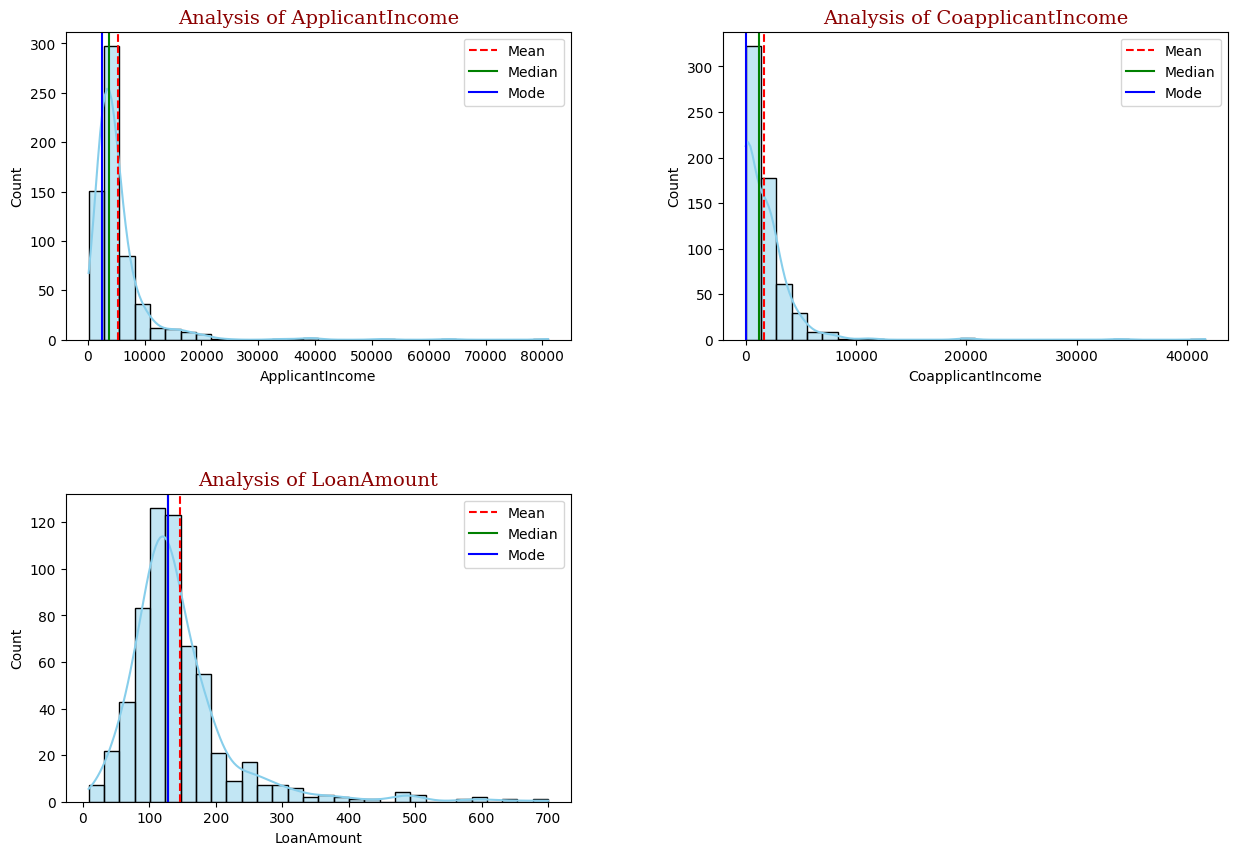

In [15]:
generate_distribution_plot(data_handled, continuous_features)

## Encoding categorical data to numeric data

In [16]:
# Convert categorical features to continuous features with Label Encoding
encod_data = data_handled.copy()
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in encod_data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    encod_data[col] = lencoders[col].fit_transform(encod_data[col])
encod_data.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

### Loan Status distribution

In [17]:
pic_data = encod_data.copy()
pic_data['Loan_Status'].replace({'N': 0, 'Y': 1},inplace = True)

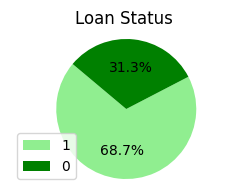

In [18]:
value_counts = pic_data.Loan_Status.value_counts(normalize=True)
plt.figure(figsize=(3, 2))  
plt.pie(value_counts,  autopct='%1.1f%%', colors=['lightgreen', 'green'], startangle=140)
plt.title('Loan Status ')
plt.legend( value_counts.index, loc="best")
plt.axis('equal')
plt.show()

## Box plot and outlier removal

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot(df, continuous_features):
    # Create a copy of the dataset containing only continuous features
    data = df[continuous_features].copy()
    
    # Number of features and subplots configuration
    num_features = len(data.columns)
    cols = 3  # Number of columns for subplots
    rows = (num_features + cols - 1) // cols  # Calculate rows dynamically
    
    # Create subplots
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 5, rows * 5))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    axes = axes.flatten()  # Flatten the axes array for easier iteration
    
    # Font settings for titles
    font = {
        'family': 'serif',
        'color': 'darkblue',
        'weight': 'normal',
        'size': 14,
    }
    
    # Generate boxplots
    for i, feature in enumerate(data.columns):
        sns.boxplot(data=data, y=feature, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Boxplot of {feature}', fontdict=font)
        axes[i].set_xlabel('')
    
    # Remove unused subplot axes
    for j in range(num_features, len(axes)):
        fig.delaxes(axes[j])
    
    plt.show()



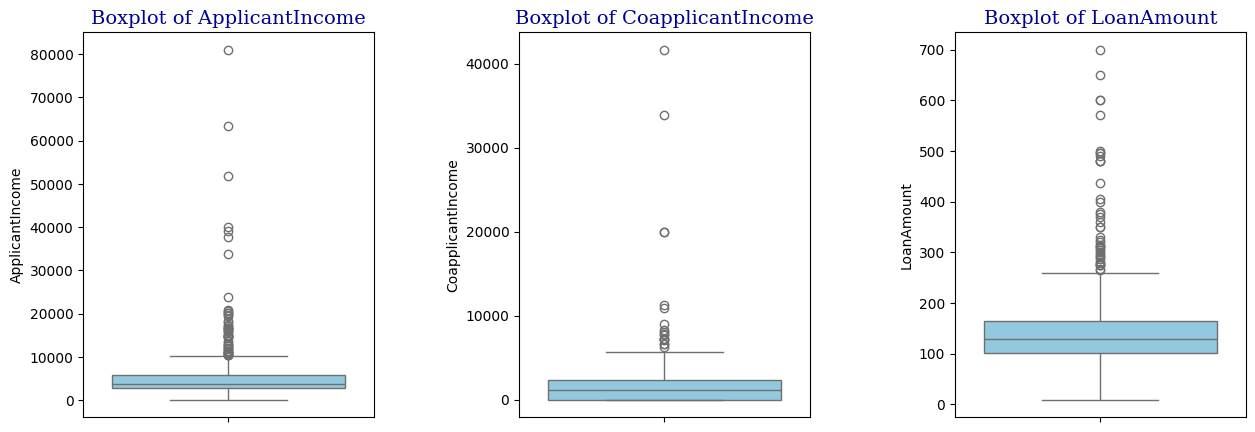

In [20]:
#Box plot before outlier removal
plot_boxplot(encod_data, continuous_features)


In [21]:
def remove_outliers(df,outliers_features):
    # create copy of dataframe
    data = df.copy()
    for feature in data[outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data = data[(data[feature] <= upper_limit) & (data[feature] >= lower_limit)]
    return data


In [22]:
#outlier removal using IQR technique
data_iqr = remove_outliers(encod_data,continuous_features)
data_afteroutlier = data_iqr.copy()
print(data.shape)
data_afteroutlier.shape

(614, 13)


(520, 13)

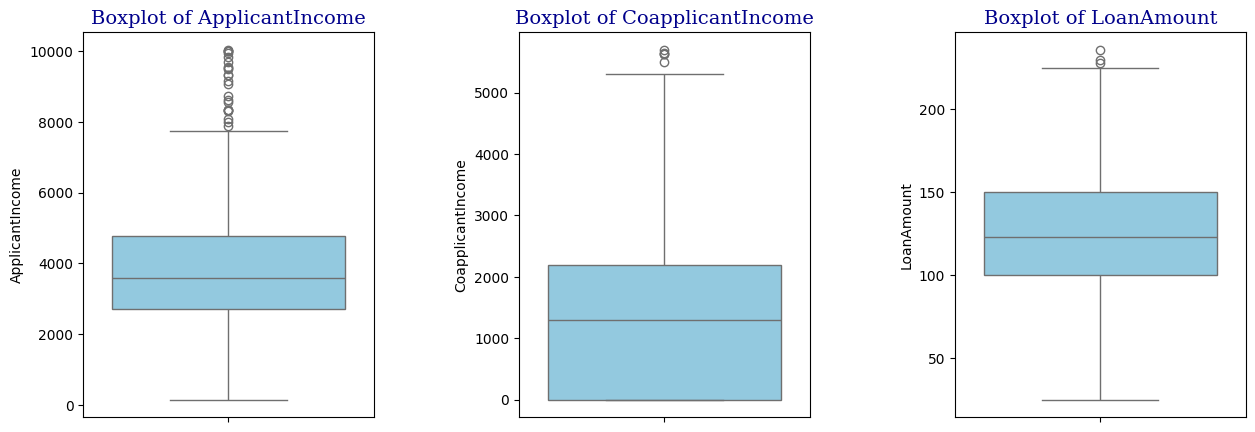

In [23]:
#Box plot after outlier removal
plot_boxplot(data_afteroutlier, continuous_features)


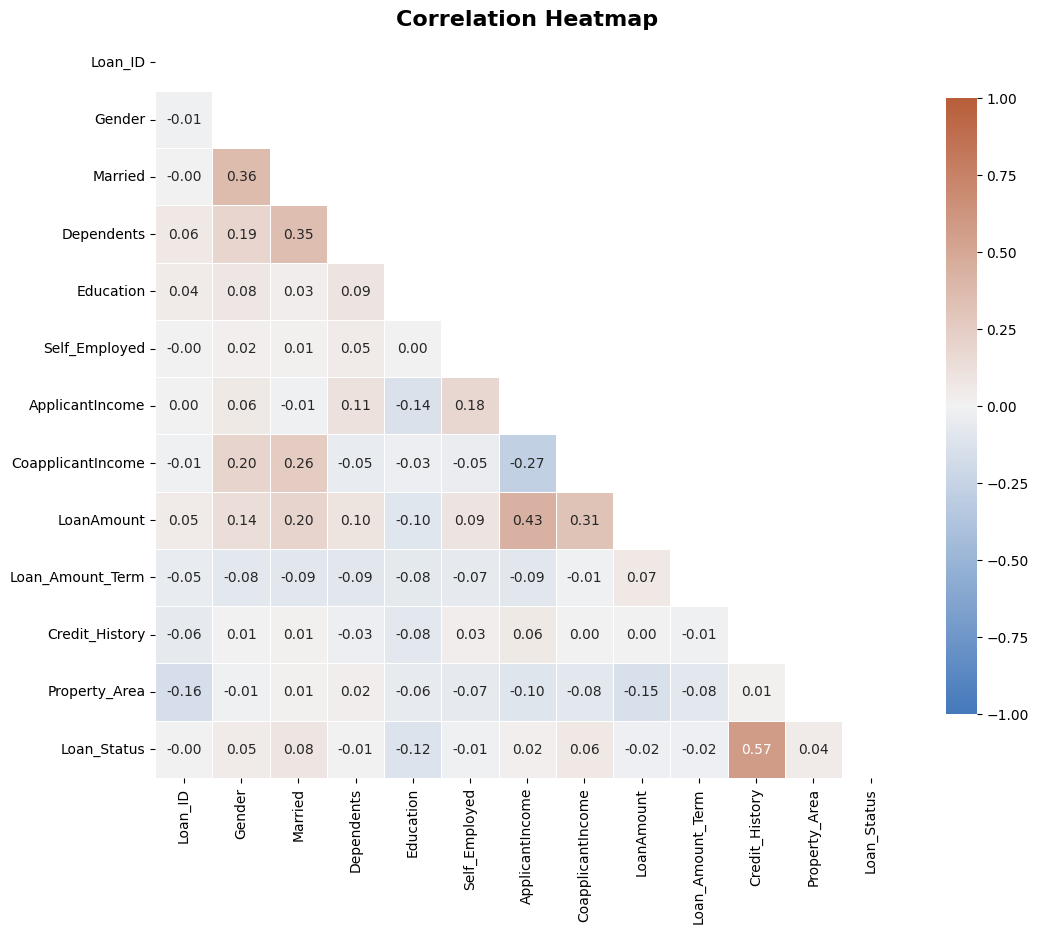

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_heatmap(df):

    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(12, 10))  # Adjust figure size for readability
    cmap = sns.diverging_palette(250, 25, as_cmap=True)
    
    sns.heatmap(
        corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True,
        annot=True, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8}
    )
    
    ax.set_title("Correlation Heatmap", fontsize=16, weight='bold')
    plt.show()

plot_correlation_heatmap(data_afteroutlier)


## Pair plot to visualize data correlation

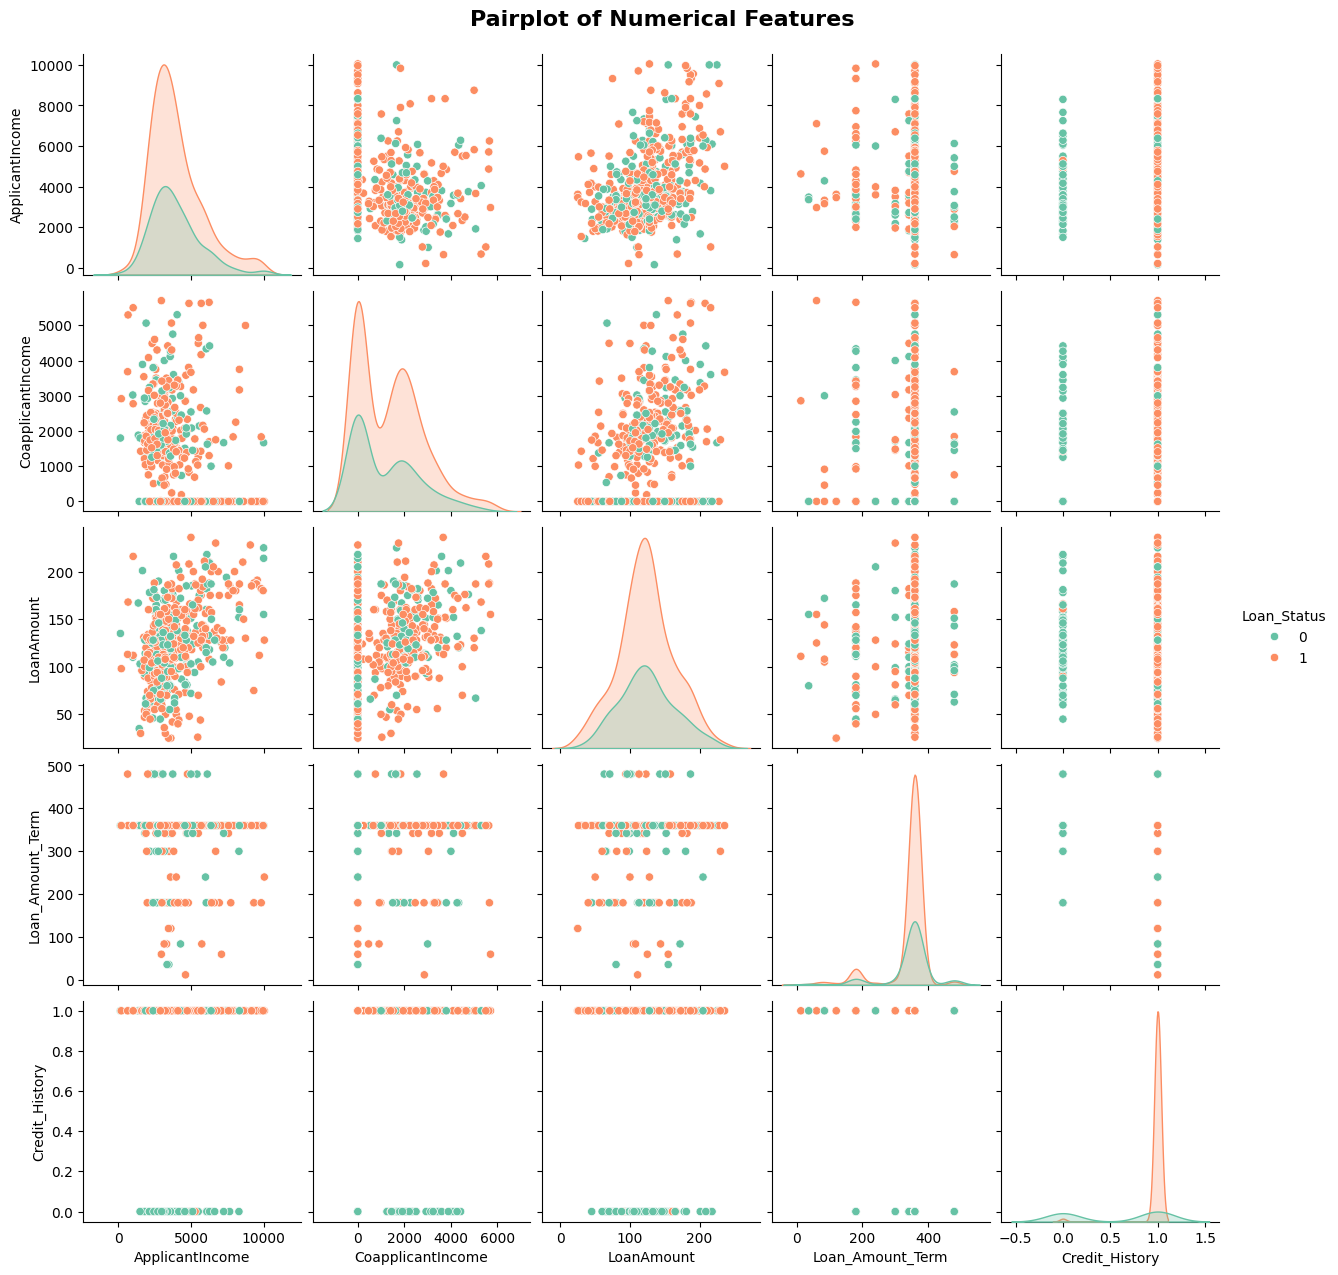

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_pairplot(df, hue=None):
    numerical_columns = [col for col in df.columns if df[col].dtypes in ['int64', 'float64']]
    
    sns.pairplot(data=df, vars=numerical_columns, hue=hue, diag_kind="kde", palette="Set2")
    plt.suptitle("Pairplot of Numerical Features", y=1.02, fontsize=16, weight="bold")
    plt.show()

plot_pairplot(data_afteroutlier, hue='Loan_Status') 

## Sorting DataFrame values

In [26]:
# with single parameter - Value
data_new = data_afteroutlier.copy()
sorted_data_single = data_new.sort_values(by='ApplicantIncome') 
display(sorted_data_single)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
216,216,1,1,0,0,0,150,1800.0,135.0,360.0,1.0,0,0
468,468,0,1,2,1,0,210,2917.0,98.0,360.0,1.0,1,1
500,500,0,0,0,0,0,645,3683.0,113.0,480.0,1.0,0,1
188,188,1,1,0,0,1,674,5296.0,168.0,360.0,1.0,0,1
77,77,1,1,1,0,1,1000,3022.0,110.0,360.0,1.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,598,1,1,0,0,1,9963,0.0,180.0,360.0,1.0,0,1
210,210,0,0,0,0,0,10000,0.0,214.0,360.0,1.0,1,0
319,319,1,1,1,0,1,10000,0.0,155.0,360.0,1.0,0,0
148,148,0,0,0,0,0,10000,1666.0,225.0,360.0,1.0,0,0


In [27]:
# sorting with multi parameter with order ascending or descending
sort_multi = data_new.sort_values(by=['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome'], ascending=[True, True,False])
display(sort_multi)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
133,133,1,1,0,0,1,3459,0.0,25.0,120.0,1.0,1,1
94,94,1,0,0,1,0,3620,0.0,25.0,120.0,1.0,1,1
555,555,1,1,1,0,0,5468,1032.0,26.0,360.0,1.0,1,1
147,147,1,1,1,0,0,1538,1425.0,30.0,360.0,1.0,2,1
270,270,0,0,0,0,0,3237,0.0,30.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,412,1,1,0,1,0,6096,0.0,218.0,360.0,0.0,0,0
148,148,0,0,0,0,0,10000,1666.0,225.0,360.0,1.0,0,0
350,350,1,1,0,0,0,9083,0.0,228.0,360.0,1.0,1,1
476,476,1,1,2,0,0,6700,1750.0,230.0,300.0,1.0,1,1


## Merge Data Frames

In [28]:
df1 = encod_data.copy()
df2 = data_new.copy()
df_merged  = pd.merge(df1,df2)

## Apply Function

In [29]:
# if year greater than 2019 it is termed as COVID
def fun(value):
    if value>100:
        return "HIGH"
    else:
        return "LOW"

data_c=data_afteroutlier.copy()
data_c['AmountLevel'] = data_c['LoanAmount'].apply(fun)
display(data_c)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,AmountLevel
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,HIGH
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,HIGH
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,LOW
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,HIGH
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,608,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1,HIGH
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,LOW
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1,LOW
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1,HIGH


## By using the lambda operator

In [30]:
# adding 10 years to the existing year
data_cpy = data_afteroutlier.copy()
data_cpy['Inc'] = data_copy['ApplicantIncome'].apply(lambda x: x / 10)
display(data_cpy)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Inc
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,584.9
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,458.3
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,300.0
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,258.3
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,608,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1,323.2
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,290.0
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1,410.6
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1,758.3


# <center> Thank You </center>

<div style="text-align: right;font-size: 24px;">
<b>Sivaprakash V</b>
</div>